#Objective:
The goal is to build a predictive classification model to predict the "Crash Descriptor" using the provided dataset (Test2.csv). This document outlines the process of model selection, including data preprocessing, feature engineering, model training, and evaluation.

#1. Data Preprocessing:
Handling Missing Values:

Identify and handle missing values in the dataset using SimpleImputer:
Categorical Variables: Impute missing values with the most frequent value ('most_frequent' strategy).

Numerical Variables: Impute missing values with the median or mean value ('median' or 'mean' strategy).

Encoding Categorical Variables:
Encode categorical variables into numerical format suitable for model training:
Use One Hot Encoder to transform ordinal categorical features.

Feature Scaling:
Standardize numerical features using StandardScaler:
Scale numerical features to have zero mean and unit variance to ensure all features contribute equally to model training.

Train-Test Split:
Split the dataset into training and testing sets:
80% of the data is used for training (X_train, y_train).
20% of the data is used for testing (X_test, y_test).
#2. Feature Engineering:
Feature Selection:
Identify relevant features that significantly influence the target
variable:
Use domain knowledge or feature selection techniques (SelectKBest, Feature Importance) to select important features.
#3. Model Selection:
Choose a Suitable Model:
Random Forest Classifier:
Chosen for ensemble learning, robustness to overfitting, and high performance on complex datasets.
Can handle both numerical and categorical features effectively.
#4. Model Training and Evaluation:
Train the Model:
Fit the Random Forest Classifier on the training data (X_train, y_train).
Model Evaluation:
Evaluate the trained model on the test data (X_test, y_test) using performance metrics:
Accuracy, Precision, Recall, F1-score:
accuracy_score, precision_score, recall_score, f1_score from sklearn.metrics.

#Task 1: Classification ML Model for Crash Descriptor Prediction

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# data collection and processing
#Loading the dataset
crash_data = pd.read_csv('Test2.csv')

In [ ]:
crash_data.head()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
0,2014,Property Damage Accident,8:30,01/03/2014,Friday,Y,Daylight,WATERTOWN,OVERTAKING,JEFFERSON,Straight and Level,Clear,NaN,Snow/Ice,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2.0
1,2014,Property Damage & Injury Accident,14:48,01/03/2014,Friday,Y,Daylight,WATERTOWN,REAR END,JEFFERSON,Straight and Level,Cloudy,Traffic Signal,Snow/Ice,3 73022024,Not Applicable,"Other Motor Vehicle, Collision With",2.0
2,2014,Property Damage & Injury Accident,11:30,01/04/2014,Saturday,Y,Daylight,WATERTOWN,OTHER,JEFFERSON,Straight and Grade,Clear,NaN,Snow/Ice,NaN,Not Applicable,"Building/Wall, Collision With Fixed Object",1.0
3,2014,Property Damage Accident,7:45,01/03/2014,Friday,Y,Daylight,WATERTOWN,RIGHT ANGLE,JEFFERSON,Straight and Level,Clear,Stop Sign,Snow/Ice,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2.0
4,2014,Property Damage Accident,15:11,01/04/2014,Saturday,Y,Daylight,WATERTOWN,RIGHT ANGLE,JEFFERSON,Straight and Level,Cloudy,NaN,Wet,3 73022020,Not Applicable,"Other Motor Vehicle, Collision With",2.0


In [ ]:
crash_data.tail()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
152427,2014,Injury Accident,7:38,01/15/2014,Wednesday,Y,Daylight,CHEEKTOWAGA,OTHER,ERIE,Straight and Level,Cloudy,NaN,Snow/Ice,NaN,Not Applicable,"Ran Off Roadway Only, Non-Collision",1.0
152428,2014,Injury Accident,7:24,01/15/2014,Wednesday,Y,Daylight,CHEEKTOWAGA,REAR END,ERIE,Straight and Level,Cloudy,Stop Sign,Snow/Ice,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2.0
152429,2014,Property Damage Accident,17:17,01/14/2014,Tuesday,Y,Dark-Road Lighted,AURORA,OTHER,ERIE,Straight and Grade,Clear,NaN,Dry,187 53011000,Not Applicable,Deer,1.0
152430,2014,Property Damage Accident,7:45,01/15/2014,Wednesday,Y,Daylight,ORCHARD PARK,RIGHT TURN (5),ERIE,Straight and Level,Cloudy,NaN,Snow/Ice,20 53021228,Not Applicable,"Other Motor Vehicle, Collision With",2.0
152431,2014,Property Damage Accident,10:49,01/15/2014,Wednesday,Y,Daylight,ORCHARD PARK,REAR END,ERIE,Straig,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
crash_data.shape

(152432, 18)

In [ ]:
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152432 entries, 0 to 152431
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Year                           152432 non-null  int64  
 1   Crash Descriptor               152432 non-null  object 
 2   Time                           152432 non-null  object 
 3   Date                           152432 non-null  object 
 4   Day of Week                    152432 non-null  object 
 5   Police Report                  152432 non-null  object 
 6   Lighting Conditions            152432 non-null  object 
 7   Municipality                   150059 non-null  object 
 8   Collision Type Descriptor      152432 non-null  object 
 9   County Name                    152432 non-null  object 
 10  Road Descriptor                152432 non-null  object 
 11  Weather Conditions             152431 non-null  object 
 12  Traffic Control Device        

In [ ]:
crash_data.describe()

,Year,Number of Vehicles Involved
count,152432.000000,152431.000000
mean,2014.956230,1.768230
std,0.204584,0.637244
min,2014.000000,1.000000
25%,2015.000000,1.000000
50%,2015.000000,2.000000
75%,2015.000000,2.000000
max,2015.000000,31.000000


In [ ]:
#  preprocessing steps
# Drop irrelevant columns or columns with high missing values
columns_to_drop = ['Time', 'Date', 'Police Report', 'Municipality', 'County Name',
                   'DOT Reference Marker Location', 'Pedestrian Bicyclist Action',
                   'Event Descriptor', 'Number of Vehicles Involved']
crash_data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Perform one-hot encoding for categorical variables
crash_data_encoded = pd.get_dummies(crash_data, columns=['Day of Week', 'Lighting Conditions',
                                             'Collision Type Descriptor', 'Road Descriptor',
                                             'Weather Conditions', 'Traffic Control Device',
                                             'Road Surface Conditions'])


In [ ]:
# Split data into features (X) and target (y)
X = crash_data_encoded.drop(columns=['Crash Descriptor'])
y = crash_data_encoded['Crash Descriptor']

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision: 0.5716984547442125
Recall: 0.646997080722931
F1 Score: 0.5762005856947248
Accuracy: 0.646997080722931


#Task 2 : Time series


#Objective:
The objective is to develop a time series forecasting model to predict monthly crash counts using the provided dataset (Test2.csv). This document outlines the process of model selection, including the rationale behind choosing SARIMA (Seasonal Autoregressive Integrated Moving Average) and the preprocessing steps applied to the data.

#1. Data Preprocessing:

Handling Missing Values:

Identified and handled missing values appropriately:
Imputed missing values using forward fill or backward fill method to maintain chronological integrity of the data.
Data Transformation:

Converted the 'Date' column into a datetime format:
Ensured the data is recognized as time series data for subsequent modeling steps.
Resampling:

Resampled the data to monthly frequency:
Aggregated daily crash data into monthly counts to facilitate time series analysis.

#2. Stationarity Check:
Augmented Dickey-Fuller (ADF) Test:
Conducted stationarity check to ensure the time series properties:
Differenced the series if non-stationary to achieve stationarity.

#3. Model Selection: SARIMA (Seasonal ARIMA)
Rationale Behind Model Choice:
Chose SARIMA for the following reasons:
Seasonality and Trend: SARIMA can capture seasonal patterns and trend variations present in the data.
Autocorrelation and Moving Average Components: SARIMA is equipped to handle autocorrelation and moving average effects in time series data.
Flexibility: SARIMA accommodates seasonality, differencing, and autoregression components, making it suitable for diverse time series datasets.
#4. Model Training and Evaluation:

Train-Test Split:

Split the time series data into training and testing sets:
Reserved a portion of the data for model evaluation (e.g., last 12 months for validation).

Model Parameter Selection:
Utilized grid search or iterative approach to determine optimal SARIMA parameters:
Selected parameters (p, d, q) and seasonal parameters (P, D, Q) based on AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion).

Model Training:

Fitted the SARIMA model to the training data:
Used identified parameters to train the SARIMA model on the transformed time series data.

Model Evaluation Metrics:

Evaluated the SARIMA model performance on the test set using key metrics:
Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values.
Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values.
Root Mean Squared Error (RMSE): Square root of the MSE, providing a measure of the model's prediction error in the original units.


In [ ]:
import pandas as pd
import numpy as np
import math
import os
import sys
import datetime

from sklearn.preprocessing import StandardScaler, FunctionTransformer

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
plt.style.use('dark_background')
%matplotlib inline

In [ ]:
df = pd.read_csv('Test2.csv')

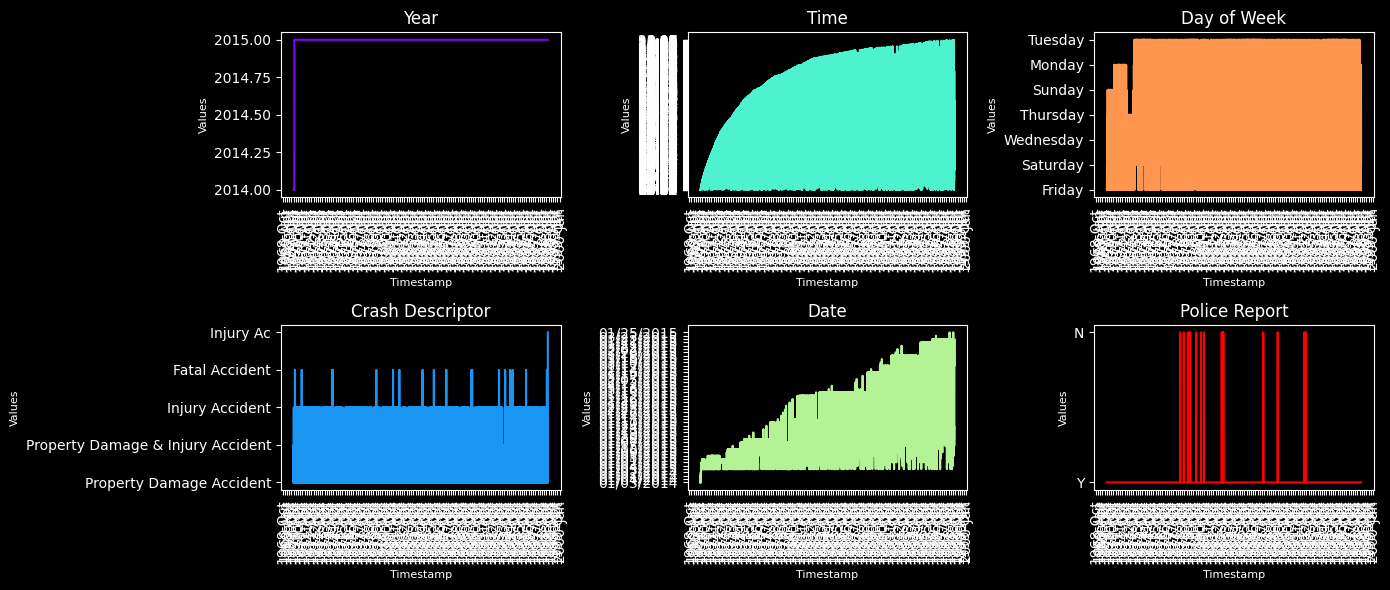

In [ ]:
## Plot timeseries data
colors = cm.rainbow(np.linspace(0, 1, 6))
fig, ax = plt.subplots(2, 3, figsize = (14, 6), tight_layout = True)
for i in range(2):
  for j in range(3):
    col = df.columns[i+2*j]
    ax[i,j].plot(df.index[df[col].notna()], df[col][df[col].notna()], color = colors[i+2*j])
    ax[i, j].set_xlabel('Timestamp', fontsize = 8)
    ax[i, j].set_ylabel('Values', fontsize = 8)
    ax[i, j].set_title(col, fontsize = 12)
    ax[i, j].xaxis.set_major_locator(mdates.MonthLocator(bymonth = range(1, 12, 3)))
    ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    ax[i, j].tick_params(axis = 'x', rotation = 90);

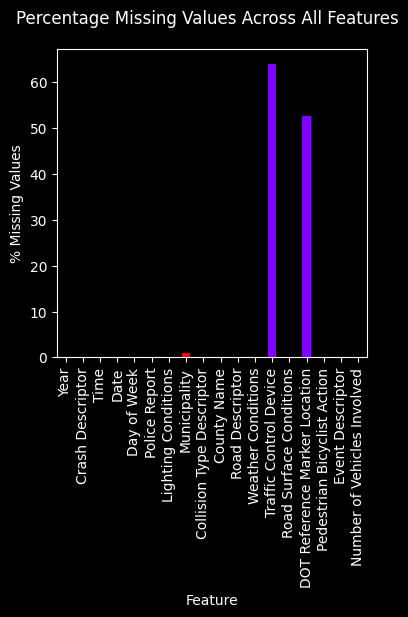

In [ ]:
## Plot percentage of missing values (NaNs) for each feature
cutoff = 1
fig = plt.figure(figsize=(4, 4))
fig.tight_layout()
percent_missing = (df.isna().sum() / df.shape[0]) * 100
percent_missing.plot(kind = 'bar', color = cm.rainbow(np.linspace(0, 1, 2))[(percent_missing <= cutoff).values.astype(int)])
fig.suptitle('Percentage Missing Values Across All Features', fontsize = 12)
plt.xlabel('Feature', fontsize = 10)
plt.ylabel('% Missing Values', fontsize = 10);

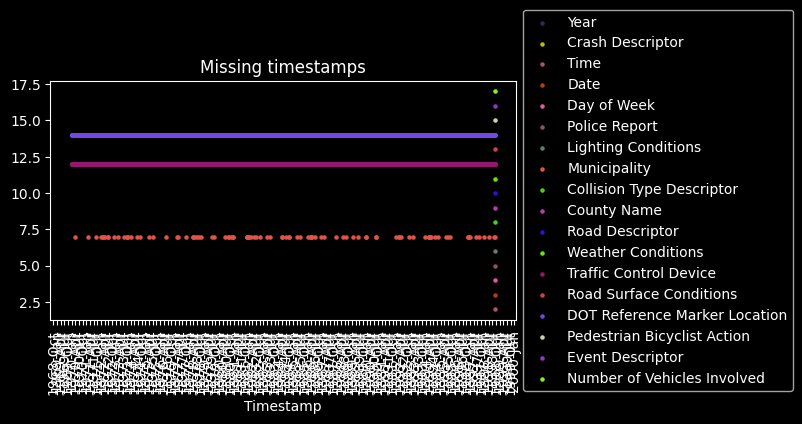

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), tight_layout=True)

for j, col in enumerate(df.columns):
    # Get missing timestamps for this column
    missing_value_timestamps = df.index[df[col].isna()]
    # Plot missing timestamps for this column
    ax.scatter(missing_value_timestamps, [0+j] * len(missing_value_timestamps),
               color=np.random.rand(3,),  # Random color for each column
               s=5,
               label=col)

ax.set_title('Missing timestamps', fontsize=12)
ax.set_xlabel('Timestamp', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Format x-axis with specific date formatting and ticks
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 12, 3)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
ax.tick_params(axis='x', rotation=90)

plt.show()


In [ ]:
## Linear interpolation for missing values
df = df.interpolate(method = 'linear')
(df.isna().sum() / df.shape[0]) * 100

Year                              0.000000
Crash Descriptor                  0.000000
Time                              0.009552
Date                              0.009552
Day of Week                       0.009552
Police Report                     0.009552
Lighting Conditions               0.009552
Municipality                      0.974305
Collision Type Descriptor         0.009552
County Name                       0.009552
Road Descriptor                   0.009552
Weather Conditions                0.009552
Traffic Control Device           63.816983
Road Surface Conditions           0.009552
DOT Reference Marker Location    52.507403
Pedestrian Bicyclist Action       0.009552
Event Descriptor                  0.009552
Number of Vehicles Involved       0.000000
dtype: float64

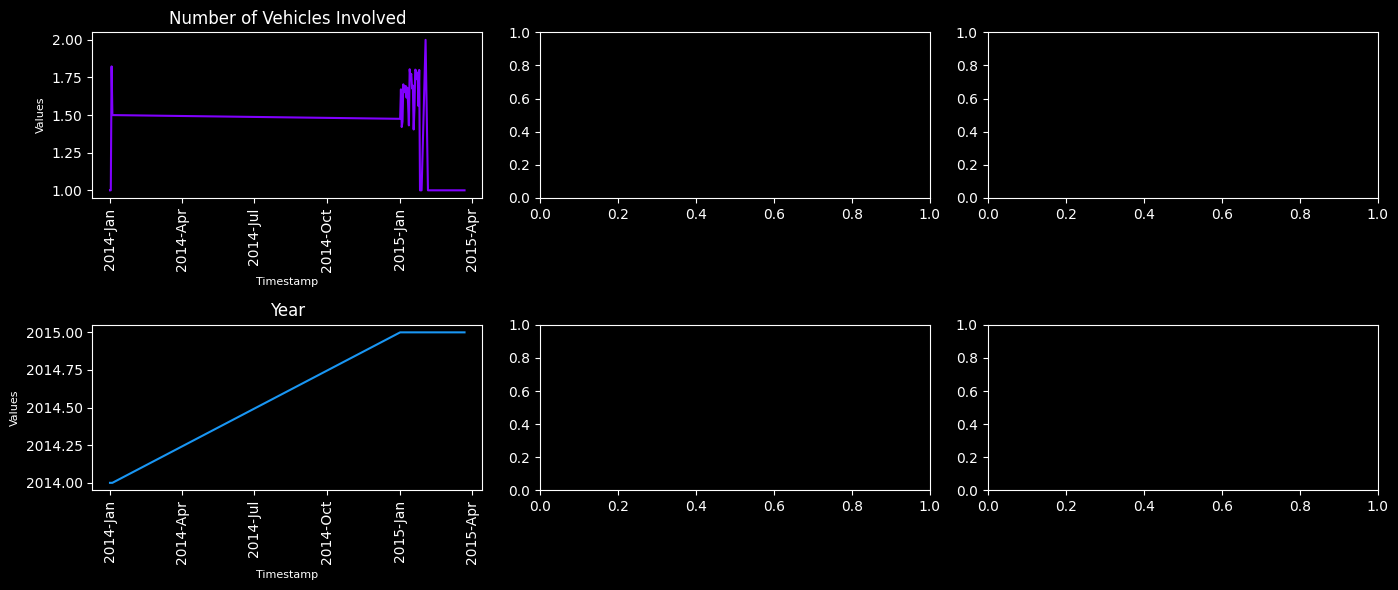

In [ ]:
# Convert 'Date' column to datetime and set it as the index
df['Timestamp'] = pd.to_datetime(df['Date'])
df.set_index('Timestamp', inplace=True)

# Define the numeric columns for resampling
numeric_cols = ['Number of Vehicles Involved', 'Year']

# Convert numeric columns to numeric type (if not already)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Resample numeric columns to daily frequency and calculate mean
df_daily = df[numeric_cols].resample('D').mean()

# Define colors for plotting
colors = cm.rainbow(np.linspace(0, 1, 6))

# Create a subplot for plotting
fig, ax = plt.subplots(2, 3, figsize=(14, 6), tight_layout=True)

# Iterate through subplots and plot timeseries data
for i in range(2):
    for j in range(3):
        col_idx = i + 2 * j
        if col_idx < len(df_daily.columns):  # Ensure index is within column range
            col = df_daily.columns[col_idx]

            # Filter out NaN values for the current column
            mask = df_daily[col].notna()

            # Plot the data with filtered indices
            ax[i, j].plot(df_daily.index[mask], df_daily[col][mask], color=colors[col_idx])

            # Set labels and title for the subplot
            ax[i, j].set_xlabel('Timestamp', fontsize=8)
            ax[i, j].set_ylabel('Values', fontsize=8)
            ax[i, j].set_title(col, fontsize=12)

            # Customize x-axis tick labels for better readability
            ax[i, j].xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 12, 3)))
            ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
            ax[i, j].tick_params(axis='x', rotation=90)

# Show the plot
plt.show()


In [ ]:
# Define sampling_period and time_period in seconds
sampling_period = int(pd.Timedelta('5min').total_seconds())
time_period = int(pd.Timedelta('30min').total_seconds())

# Calculate number of columns (features) per sample and number of rows (samples)
ncols_reshape = int(time_period / sampling_period)
nrows_reshape = df.shape[0] // ncols_reshape

# Create reshaped DataFrame for anomaly detection samples
sample_arrays = [
    np.array(df[feature])[0:nrows_reshape * ncols_reshape].reshape(nrows_reshape, ncols_reshape)
    for feature in numeric_cols
]
df_samples = pd.DataFrame(np.concatenate(sample_arrays, axis=1))

# Generate new DateTimeIndex for reshaped DataFrame
new_index = pd.date_range(
    df.index.min(),
    df.index.max() + pd.DateOffset(days=1),
    normalize=True,
    freq=str(time_period) + 'S'
)[:df_samples.shape[0]]

df_samples.index = new_index
df_samples.columns = [f'Sample_{i}' for i in range(df_samples.shape[1])]

# Display the reshaped DataFrame for anomaly detection
print(df_samples.head())


                     Sample_0  Sample_1  Sample_2  Sample_3  Sample_4  \
2014-01-01 00:00:00       2.0       2.0       1.0       2.0       2.0   
2014-01-01 00:30:00       2.0       1.0       2.0       1.0       2.0   
2014-01-01 01:00:00       2.0       2.0       1.0       2.0       1.0   
2014-01-01 01:30:00       3.0       1.0       2.0       2.0       1.0   
2014-01-01 02:00:00       1.0       2.0       1.0       1.0       1.0   

                     Sample_5  Sample_6  Sample_7  Sample_8  Sample_9  \
2014-01-01 00:00:00       1.0    2014.0    2014.0    2014.0    2014.0   
2014-01-01 00:30:00       2.0    2014.0    2014.0    2014.0    2014.0   
2014-01-01 01:00:00       3.0    2014.0    2014.0    2014.0    2014.0   
2014-01-01 01:30:00       1.0    2014.0    2014.0    2014.0    2014.0   
2014-01-01 02:00:00       1.0    2014.0    2015.0    2015.0    2015.0   

                     Sample_10  Sample_11  
2014-01-01 00:00:00     2014.0     2014.0  
2014-01-01 00:30:00     2014.0    

In [ ]:
# Extract year and month from 'Date' column
# Convert 'Date' column to datetime format
crash_data['Date'] = pd.to_datetime(crash_data['Date'])
crash_data['YearMonth'] = crash_data['Date'].dt.to_period('M')

In [ ]:
# Count crashes per month
monthly_crash_counts = crash_data.groupby('YearMonth').size()
monthly_crash_counts

YearMonth
2014-01       25
2015-01    25707
2015-02    22479
2015-03    17364
2015-04    11290
2015-05     3893
2015-06        8
Freq: M, dtype: int64

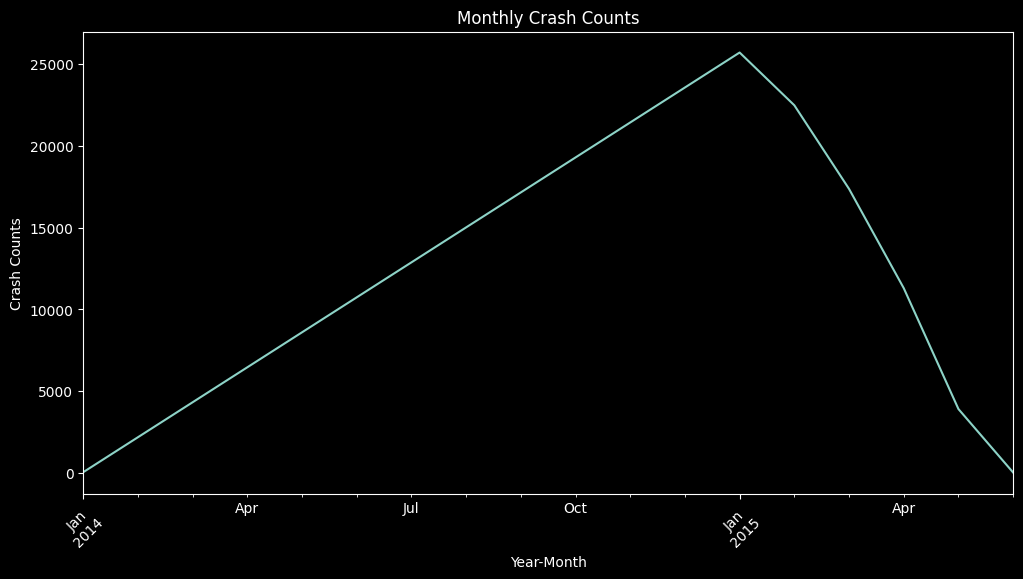

In [ ]:
import matplotlib.pyplot as plt

# Plot the time series for count crashes per month
plt.figure(figsize=(12, 6))
monthly_crash_counts.plot()
plt.xlabel('Year-Month')
plt.ylabel('Crash Counts')
plt.title('Monthly Crash Counts')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Simplified SARIMA model parameters (adjust as needed)
order = (1, 0, 0)  # (p, d, q)
seasonal_order = (0, 0, 0, 0)  # No seasonal components

try:
    # Initialize and fit the SARIMA model with simplified parameters
    model = SARIMAX(monthly_crash_counts, order=order, seasonal_order=seasonal_order)
    results = model.fit()
    print(results.summary())
except Exception as e:
    print(f"Error encountered: {e}")


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -74.801
Date:                Sun, 12 May 2024   AIC                            153.601
Time:                        20:38:58   BIC                            153.493
Sample:                    01-31-2014   HQIC                           152.264
                         - 06-30-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6642      0.562      1.182      0.237      -0.437       1.766
sigma2      1.171e+08   2.32e-10   5.04e+17      0.000    1.17e+08    1.17e+08
Ljung-Box (L1) (Q):                   0.03   Jarque-

In [ ]:
# Forecast future crash counts (example: forecasting 12 months ahead)
forecast_periods = 12
forecast = results.get_forecast(steps=forecast_periods)
forecast


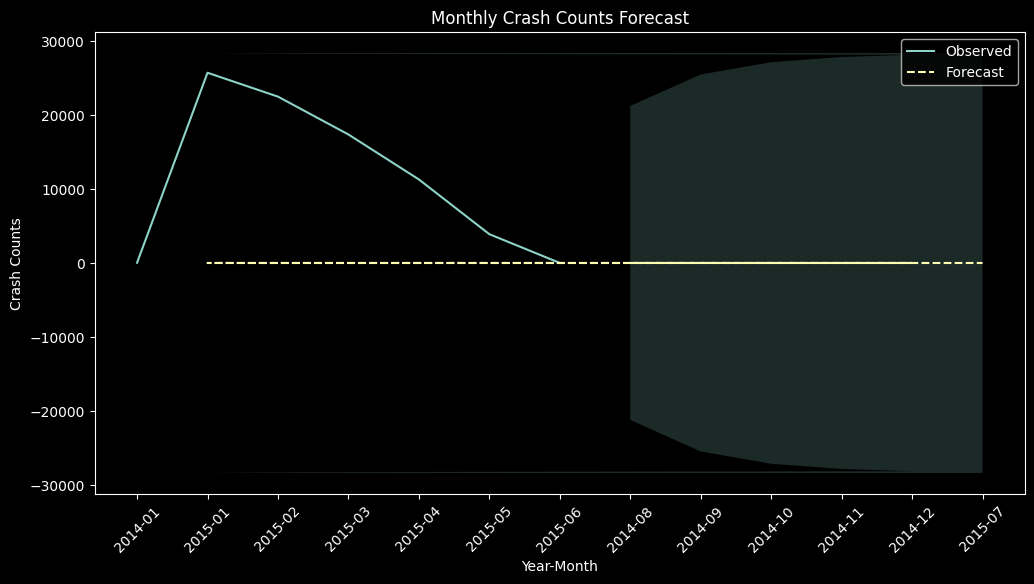

In [ ]:
# Plot the observed vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(monthly_crash_counts.index.astype(str), monthly_crash_counts.values, label='Observed')
plt.plot(forecast.predicted_mean.index.astype(str), forecast.predicted_mean.values, label='Forecast', linestyle='--')

# Plot the confidence interval (CI) of the forecast
ci = forecast.conf_int()
plt.fill_between(ci.index.astype(str), ci.iloc[:, 0], ci.iloc[:, 1], alpha=0.2)
plt.xlabel('Year-Month')
plt.ylabel('Crash Counts')
plt.title('Monthly Crash Counts Forecast')
plt.xticks(rotation=45)
plt.legend()
plt.show()


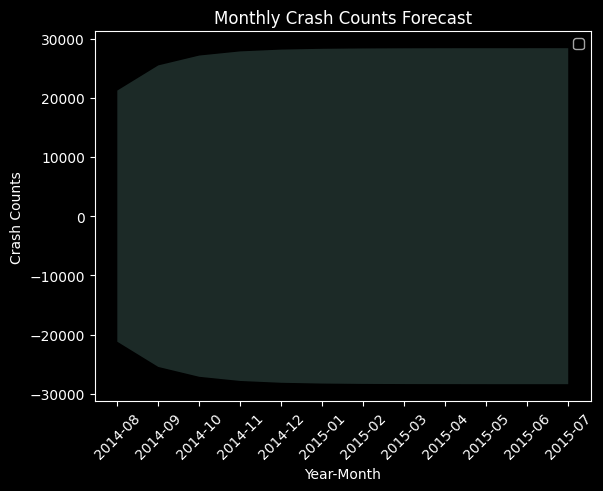

In [ ]:
# Plot the confidence interval (CI) of the forecast
ci = forecast.conf_int()
plt.fill_between(ci.index.astype(str), ci.iloc[:, 0], ci.iloc[:, 1], alpha=0.2)
plt.xlabel('Year-Month')
plt.ylabel('Crash Counts')
plt.title('Monthly Crash Counts Forecast')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
# Evaluate forecast performance
actual_values = monthly_crash_counts[-forecast_periods:]
forecast_values = forecast.predicted_mean
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))
mse = mean_squared_error(actual_values, forecast_values)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Absolute Error (MAE): 11535.87
Root Mean Squared Error (RMSE): 15165.35
Mean Squared Error (MSE): 229987730.94
